In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
%matplotlib inline
style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("raw.csv")

In [4]:
df.head(5)

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1,1,1,1182019,1,18,2019,1100,2019000001,2019000001,...,114.0,1,1,1,1,0,0,2.0,1.0,2.0
1,2,1,1,1132019,1,13,2019,1100,2019000002,2019000002,...,121.0,1,1,1,1,0,0,1.0,1.0,2.0
2,3,1,1,1182019,1,18,2019,1100,2019000003,2019000003,...,164.0,1,1,1,1,0,0,1.0,2.0,2.0
3,4,1,1,1182019,1,18,2019,1200,2019000004,2019000004,...,NaN,9,9,1,1,1,1,9.0,9.0,NaN
4,5,1,1,1042019,1,4,2019,1100,2019000005,2019000005,...,178.0,1,1,1,1,0,0,2.0,1.0,2.0


In [5]:
me14 = ['BPHIGH4','TOLDHI2','CHOLCHK2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'CHCKDNY2', 'DIABETE4', 'HAVARTH4', 'PREDIAB1']
df_14 = df[me14]
df_14.head(3)

,BPHIGH4,TOLDHI2,CHOLCHK2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD2,CHCKDNY2,DIABETE4,HAVARTH4,PREDIAB1
0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0
1,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0
2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN


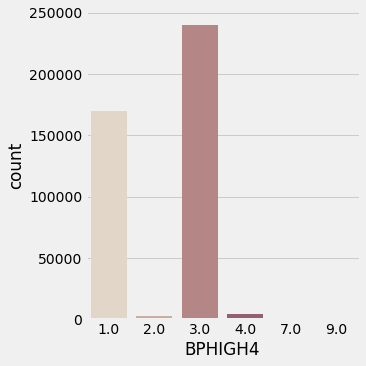

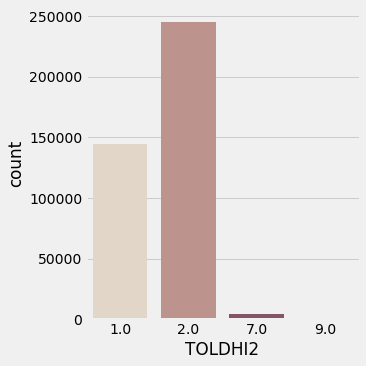

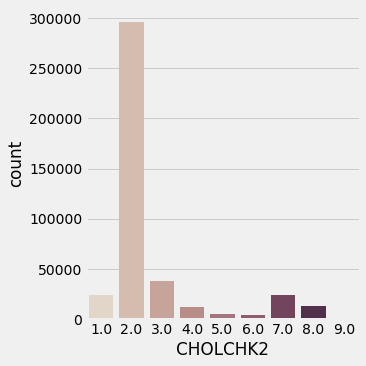

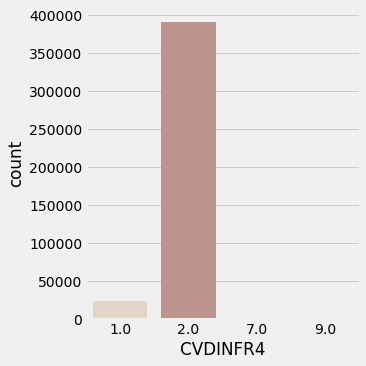

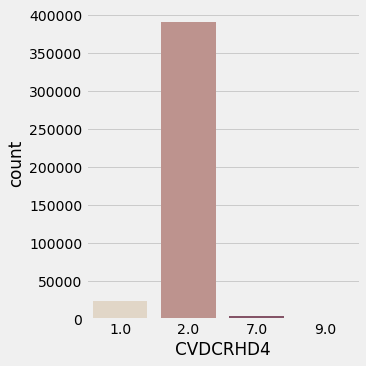

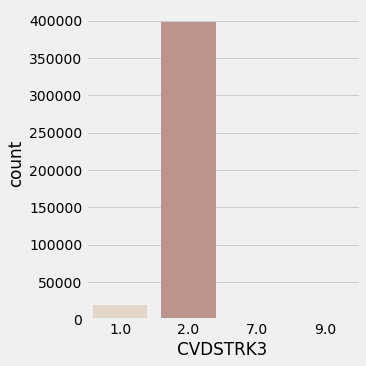

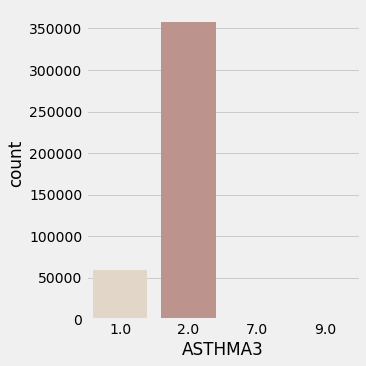

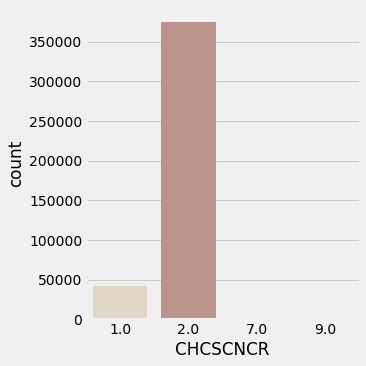

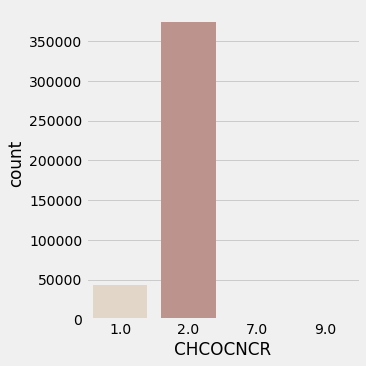

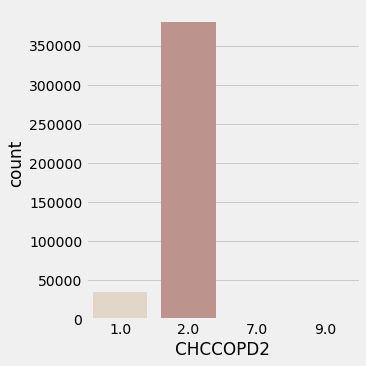

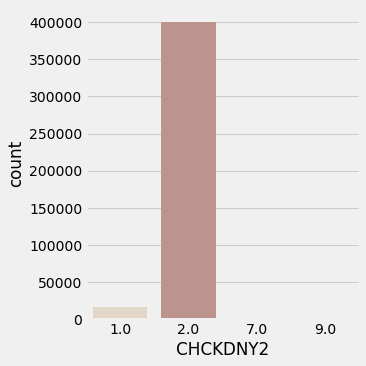

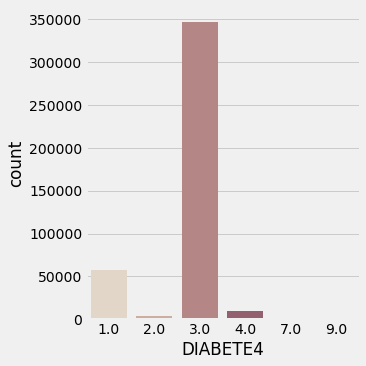

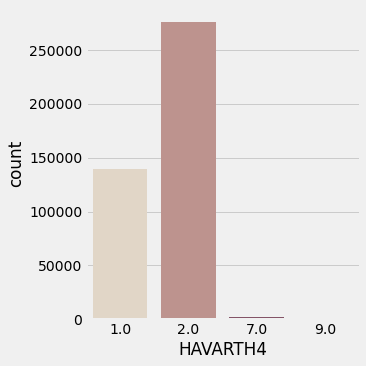

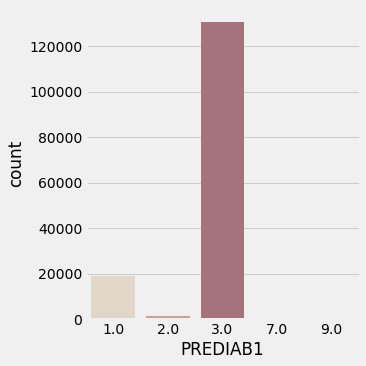

In [6]:
for x in range(len(me14)):
    sns.catplot(x= df_14[me14[x]], kind="count", palette="ch:.25", data=df)

## For most of the 14 cols, most of the refuse/don't know made up less than 5% of the other categories. Hence, I feel that I should just put it as NA
## Even for PREDIAB1, where 266k+ not asked, I feel that it should be a NA since the respondents were already asked if they had diabetes in the earlier question (Which they could have answered "No" and the surveyors chose not to ask this question.
## Hence for these reasons, I feel that there is no need for MICE with the low proportion of missing data and also solid reasoning behind replacement.
## EDIT: DROPPING PREDIAB COS TOO MUCH MISSING

In [7]:
for x in range(len(me14)):
    print(df_14[me14[x]].value_counts())

3.0    239873
1.0    169634
4.0      4117
2.0      3072
7.0      1064
9.0       504
Name: BPHIGH4, dtype: int64
2.0    245065
1.0    144170
7.0      4198
9.0       392
Name: TOLDHI2, dtype: int64
2.0    295999
3.0     38401
7.0     24083
1.0     23987
8.0     13402
4.0     12189
5.0      5211
6.0      4531
9.0       446
Name: CHOLCHK2, dtype: int64
2.0    391407
1.0     24370
7.0      2286
9.0       195
Name: CVDINFR4, dtype: int64
2.0    390820
1.0     23438
7.0      3776
9.0       226
Name: CVDCRHD4, dtype: int64
2.0    398213
1.0     18745
7.0      1118
9.0       181
Name: CVDSTRK3, dtype: int64
2.0    357838
1.0     58921
7.0      1317
9.0       184
Name: ASTHMA3, dtype: int64
2.0    375129
1.0     41773
7.0      1169
9.0       189
Name: CHCSCNCR, dtype: int64
2.0    374347
1.0     42727
7.0       896
9.0       289
Name: CHCOCNCR, dtype: int64
2.0    380565
1.0     35427
7.0      2053
9.0       215
Name: CHCCOPD2, dtype: int64
2.0    400385
1.0     16276
7.0      1392
9.0       204

In [ ]:
# condition = df.loc[(df[me14[1]] == 7.0) | (df[me14[1]] == 9.0)]

In [10]:
#since 7/9 is used as the refuse/dont know code, i will replace all with NA
for x in range(len(me14)):
    condition = (df[me14[x]] == 7.0) | (df[me14[x]] == 9.0)
    df.loc[condition,f"{me14[x]}"]= np.NaN  

In [11]:
#check
for x in range(len(me14)):
    print(df[me14[x]].value_counts())

3.0    239873
1.0    169634
4.0      4117
2.0      3072
Name: BPHIGH4, dtype: int64
2.0    245065
1.0    144170
Name: TOLDHI2, dtype: int64
2.0    295999
3.0     38401
1.0     23987
8.0     13402
4.0     12189
5.0      5211
6.0      4531
Name: CHOLCHK2, dtype: int64
2.0    391407
1.0     24370
Name: CVDINFR4, dtype: int64
2.0    390820
1.0     23438
Name: CVDCRHD4, dtype: int64
2.0    398213
1.0     18745
Name: CVDSTRK3, dtype: int64
2.0    357838
1.0     58921
Name: ASTHMA3, dtype: int64
2.0    375129
1.0     41773
Name: CHCSCNCR, dtype: int64
2.0    374347
1.0     42727
Name: CHCOCNCR, dtype: int64
2.0    380565
1.0     35427
Name: CHCCOPD2, dtype: int64
2.0    400385
1.0     16276
Name: CHCKDNY2, dtype: int64
3.0    347091
1.0     57401
4.0      9149
2.0      3782
Name: DIABETE4, dtype: int64
2.0    276020
1.0    139703
Name: HAVARTH4, dtype: int64
3.0    130616
1.0     18879
2.0      1606
Name: PREDIAB1, dtype: int64


In [12]:
df.drop('PREDIAB1', axis = 1, inplace = True)

In [13]:
df.to_csv('medical14_columns.csv', index=False)

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

In [ ]:
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)